# Assignment 10
## Assignment 10.1
In the first part of the assignment, you will implement basic text-preprocessing functions in Python. These functions do not need to scale to large text documents and will only need to handle small inputs.

### Assignment 10.1.a
Create a tokenize function that splits a sentence into words. Ensure that your tokenizer removes basic punctuation.


In [1]:
import re
from string import punctuation
import pandas as pd
import numpy as np
import seaborn as sns
from seaborn import heatmap
import matplotlib.pyplot as plt

import keras
from keras import models, layers, losses, optimizers
import sklearn.metrics as metrics


In [2]:
def tokenize(sentence, 
             filters = punctuation + "\n", 
             lower = True, 
             split = " "):
    
    # Convert string to lower case
    if lower:
        sentence = sentence.lower()
        
    # Remove all punctuation
    for i in list(filters):
        sentence = sentence.replace(i,"")
    
    # Remove duplicate spaces
    sentence = re.sub(' +', ' ',sentence)
    
    # Split by spaces
    tokens = sentence.split(split)
    return tokens

In [3]:
s = """
In my younger and more vulnerable years, my father 
gave me some advice that I've been turning over in my mind ever 
since.                                                        
                                                               
"Whenever you feel like criticizing anyone," he told me, "just 
remember that all the people in this world haven't had the ad-
vantages that you've had."
"""

In [4]:
tokens = tokenize(s)
print(tokens)

['in', 'my', 'younger', 'and', 'more', 'vulnerable', 'years', 'my', 'father', 'gave', 'me', 'some', 'advice', 'that', 'ive', 'been', 'turning', 'over', 'in', 'my', 'mind', 'ever', 'since', 'whenever', 'you', 'feel', 'like', 'criticizing', 'anyone', 'he', 'told', 'me', 'just', 'remember', 'that', 'all', 'the', 'people', 'in', 'this', 'world', 'havent', 'had', 'the', 'advantages', 'that', 'youve', 'had']



### Assignment 10.1.b

Implement an `ngram` function that splits tokens into N-grams. 


In [5]:
def ngram(tokens, n):
    ngrams = [' '.join(words for words in tokens[i:i+n]) for i in range(0,len(tokens) - n + 1)]
    return ngrams

In [6]:
print(ngram(tokens,2))

['in my', 'my younger', 'younger and', 'and more', 'more vulnerable', 'vulnerable years', 'years my', 'my father', 'father gave', 'gave me', 'me some', 'some advice', 'advice that', 'that ive', 'ive been', 'been turning', 'turning over', 'over in', 'in my', 'my mind', 'mind ever', 'ever since', 'since whenever', 'whenever you', 'you feel', 'feel like', 'like criticizing', 'criticizing anyone', 'anyone he', 'he told', 'told me', 'me just', 'just remember', 'remember that', 'that all', 'all the', 'the people', 'people in', 'in this', 'this world', 'world havent', 'havent had', 'had the', 'the advantages', 'advantages that', 'that youve', 'youve had']


### Assignment 10.1.c
Implement an one_hot_encode function to create a vector from a numerical vector from a list of tokens.


In [7]:
def one_hot_encode(tokens):
    token_index = {}
    for token in tokens:
        if token in token_index:
            token_index[token] += 1
        else:
            token_index[token] = 1
            
    return([token_index.values()], token_index.keys())

In [8]:
vals, cols = one_hot_encode(tokens)
df = pd.DataFrame(vals, columns=cols)

df

,in,my,younger,and,more,vulnerable,years,father,gave,me,...,remember,all,the,people,this,world,havent,had,advantages,youve
0,3,3,1,1,1,1,1,1,1,2,...,1,1,2,1,1,1,1,2,1,1


## Assignment 10.2
Using listings 6.16, 6.17, and 6.18 in Deep Learning with Python as a guide, train a sequential model with embeddings on the IMDB data found in data/external/imdb/. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [9]:
import keras
from IMDB import IMDB_Dataset
from keras.preprocessing.text import Tokenizer

### Loading the Data

In [10]:
# Created an external class to load the data and made a quick GUI to verify it doesn't get hung up. 
(X_train, y_train), (X_test, y_test) = IMDB_Dataset().load_data()

pos_train : [####################################################################################################]
neg_train : [####################################################################################################]
pos_test  : [####################################################################################################]
neg_test  : [####################################################################################################]


### Data Cleaning

In [11]:
X_train[0]

'Bromwell High is a cartoon comedy. It ran at the same time as some other programs about school life, such as "Teachers". My 35 years in the teaching profession lead me to believe that Bromwell High\'s satire is much closer to reality than is "Teachers". The scramble to survive financially, the insightful students who can see right through their pathetic teachers\' pomp, the pettiness of the whole situation, all remind me of the schools I knew and their students. When I saw the episode in which a student repeatedly tried to burn down the school, I immediately recalled ......... at .......... High. A classic line: INSPECTOR: I\'m here to sack one of your teachers. STUDENT: Welcome to Bromwell High. I expect that many adults of my age think that Bromwell High is far fetched. What a pity that it isn\'t!'

In [12]:
X_test[0]

"I went and saw this movie last night after being coaxed to by a few friends of mine. I'll admit that I was reluctant to see it because from what I knew of Ashton Kutcher he was only able to do comedy. I was wrong. Kutcher played the character of Jake Fischer very well, and Kevin Costner played Ben Randall with such professionalism. The sign of a good movie is that it can toy with our emotions. This one did exactly that. The entire theater (which was sold out) was overcome by laughter during the first half of the movie, and were moved to tears during the second half. While exiting the theater I not only saw many women in tears, but many full grown men as well, trying desperately not to let anyone see them crying. This movie was great, and I suggest that you go see it before you judge."

In [13]:
def data_cleaner(review):
    # Convert string to lower case
    review = review.lower()
        
    # Remove all punctuation
    for i in list(punctuation + "\n"):
        review = review.replace(i,"")
    
    # Remove duplicate spaces
    review = re.sub(' +', ' ', review)
    
    return review

In [14]:
X_train = [data_cleaner(review) for review in X_train]
X_test = [data_cleaner(review) for review in X_test]

In [15]:
print(X_train[0].split(" "))

['bromwell', 'high', 'is', 'a', 'cartoon', 'comedy', 'it', 'ran', 'at', 'the', 'same', 'time', 'as', 'some', 'other', 'programs', 'about', 'school', 'life', 'such', 'as', 'teachers', 'my', '35', 'years', 'in', 'the', 'teaching', 'profession', 'lead', 'me', 'to', 'believe', 'that', 'bromwell', 'highs', 'satire', 'is', 'much', 'closer', 'to', 'reality', 'than', 'is', 'teachers', 'the', 'scramble', 'to', 'survive', 'financially', 'the', 'insightful', 'students', 'who', 'can', 'see', 'right', 'through', 'their', 'pathetic', 'teachers', 'pomp', 'the', 'pettiness', 'of', 'the', 'whole', 'situation', 'all', 'remind', 'me', 'of', 'the', 'schools', 'i', 'knew', 'and', 'their', 'students', 'when', 'i', 'saw', 'the', 'episode', 'in', 'which', 'a', 'student', 'repeatedly', 'tried', 'to', 'burn', 'down', 'the', 'school', 'i', 'immediately', 'recalled', 'at', 'high', 'a', 'classic', 'line', 'inspector', 'im', 'here', 'to', 'sack', 'one', 'of', 'your', 'teachers', 'student', 'welcome', 'to', 'bromwel

In [16]:
print(X_test[0].split(" "))

['i', 'went', 'and', 'saw', 'this', 'movie', 'last', 'night', 'after', 'being', 'coaxed', 'to', 'by', 'a', 'few', 'friends', 'of', 'mine', 'ill', 'admit', 'that', 'i', 'was', 'reluctant', 'to', 'see', 'it', 'because', 'from', 'what', 'i', 'knew', 'of', 'ashton', 'kutcher', 'he', 'was', 'only', 'able', 'to', 'do', 'comedy', 'i', 'was', 'wrong', 'kutcher', 'played', 'the', 'character', 'of', 'jake', 'fischer', 'very', 'well', 'and', 'kevin', 'costner', 'played', 'ben', 'randall', 'with', 'such', 'professionalism', 'the', 'sign', 'of', 'a', 'good', 'movie', 'is', 'that', 'it', 'can', 'toy', 'with', 'our', 'emotions', 'this', 'one', 'did', 'exactly', 'that', 'the', 'entire', 'theater', 'which', 'was', 'sold', 'out', 'was', 'overcome', 'by', 'laughter', 'during', 'the', 'first', 'half', 'of', 'the', 'movie', 'and', 'were', 'moved', 'to', 'tears', 'during', 'the', 'second', 'half', 'while', 'exiting', 'the', 'theater', 'i', 'not', 'only', 'saw', 'many', 'women', 'in', 'tears', 'but', 'many',

### Basic EDA

In [17]:
review_lengths = [len(review.split(" ")) for review in X_train]

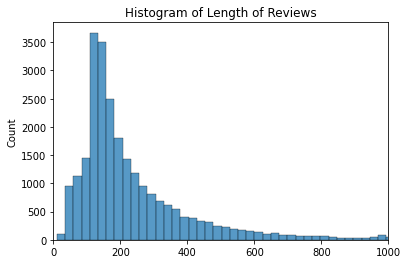

In [18]:
sns.histplot(review_lengths, bins = 100);
plt.xlim(0,1000)
plt.title("Histogram of Length of Reviews")
plt.show()

In [19]:
max(review_lengths)

2470

In [20]:
min(review_lengths)

10

### Sequential Model

In [21]:
MAX_WORDS = 10000
EMBEDDING_DIM = 100

In [22]:
# Use the keras tokenizer to select the mo
tokenizer = keras.preprocessing.text.Tokenizer(num_words = MAX_WORDS)
tokenizer.fit_on_texts(X_train)

sequences = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

MAX_LEN = max([len(x) for x in sequences])

data = keras.preprocessing.sequence.pad_sequences(sequences, maxlen=MAX_LEN)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=MAX_LEN)

labels = np.asarray(y_train)
y_test = np.asarray(y_test)

In [23]:
X_test.shape

(25000, 2152)

In [24]:
data.shape

(25000, 2152)

In [25]:
# Shuffle the data so we don't only get one class in the validation set
indices = np.arange(data.shape[0])
np.random.shuffle(indices)

data = data[indices]
labels = labels[indices]

In [26]:
# Split the data into training and validation sets
X_train = data[500:]
y_train = labels[500:]

X_val = data[:500]
y_val = labels[:500]

In [27]:
MAX_WORDS = 10000
EMBEDDING_DIM = 100

In [28]:
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense

model = Sequential()
model.add(Embedding(MAX_WORDS, 
                    EMBEDDING_DIM, 
                    input_length=X_train.shape[1]))
model.add(Flatten())
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=32,
                    validation_data=(X_val, y_val))

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 2152, 100)         1000000   
_________________________________________________________________
flatten (Flatten)            (None, 215200)            0         
_________________________________________________________________
dense (Dense)                (None, 32)                6886432   
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 7,886,465
Trainable params: 7,886,465
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
766/766 [==============================] - 92s 101ms/step - loss: 0.7207 - acc: 0.6848 - val_loss: 0.2526 - val_acc: 0.9000
Epoch 2/10
766/766 [==============================] - 80s 104ms/step - loss: 0.1679 - acc: 0.9376 - val_loss:

### Model Evaluation

In [29]:
model.evaluate(X_test,y_test)

782/782 [==============================] - 13s 16ms/step - loss: 1.3244 - acc: 0.8702


[1.3243714570999146, 0.8701599836349487]

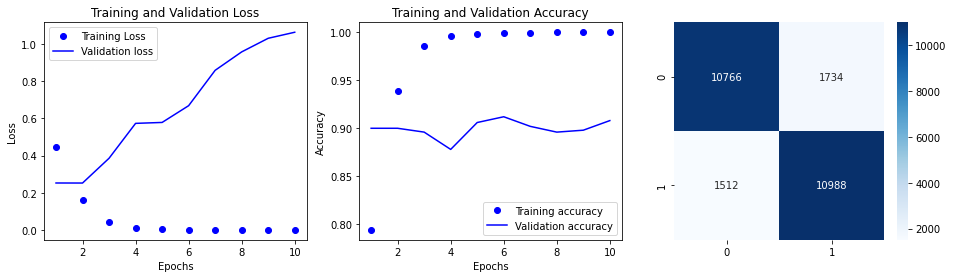

In [30]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(16,4))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=np.round(model.predict(X_test)))
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g', ax = ax3);

## Assignment 10.3
Using listing 6.27 in Deep Learning with Python as a guide, fit the same data with an LSTM layer. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [31]:
from keras.layers import LSTM

model = Sequential()
model.add(Embedding(MAX_WORDS, 
                    EMBEDDING_DIM, 
                    input_length=X_train.shape[1]))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['acc'])

model.summary()

history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_val, y_val))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 2152, 100)         1000000   
_________________________________________________________________
lstm (LSTM)                  (None, 32)                17024     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,017,057
Trainable params: 1,017,057
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
192/192 [==============================] - 418s 2s/step - loss: 0.5646 - acc: 0.7098 - val_loss: 0.3911 - val_acc: 0.8360
Epoch 2/10
192/192 [==============================] - 408s 2s/step - loss: 0.2805 - acc: 0.8940 - val_loss: 0.2647 - val_acc: 0.9080
Epoch 3/10
192/192 [==============================] - 408s 2s/step - loss: 0.2196 - acc: 0.9187 - val_loss: 

In [32]:
model.evaluate(X_test,y_test)

782/782 [==============================] - 133s 170ms/step - loss: 0.3965 - acc: 0.8675


[0.39654096961021423, 0.8675199747085571]

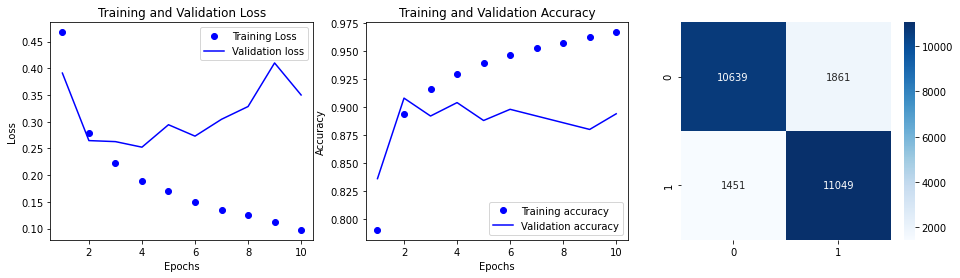

In [33]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(16,4))

ax1.plot(epochs, loss_values,  'bo', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'bo', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=np.round(model.predict(X_test)))
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g', ax = ax3);

## Assignment 10.4
Using listing 6.46 in Deep Learning with Python as a guide, fit the same data with a simple 1D convnet. Produce the model performance metrics and training and validation accuracy curves within the Jupyter notebook.

In [34]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop

max_features = 10000

model = Sequential()
model.add(Embedding(MAX_WORDS, 
                    EMBEDDING_DIM, 
                    input_length=X_train.shape[1]))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(1, activation='sigmoid'))
model.summary()


model.compile(optimizer=RMSprop(learning_rate=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])
history = model.fit(X_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_data=(X_val, y_val))

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 2152, 100)         1000000   
_________________________________________________________________
conv1d (Conv1D)              (None, 2146, 32)          22432     
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 429, 32)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 423, 32)           7200      
_________________________________________________________________
global_max_pooling1d (Global (None, 32)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 33        
Total params: 1,029,665
Trainable params: 1,029,665
Non-trainable params: 0
____________________________________________

In [35]:
model.evaluate(X_test,y_test)

782/782 [==============================] - 45s 58ms/step - loss: 0.3138 - acc: 0.8654


[0.31377503275871277, 0.8654400110244751]

In [46]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)
confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=np.round(model.predict(X_test)))

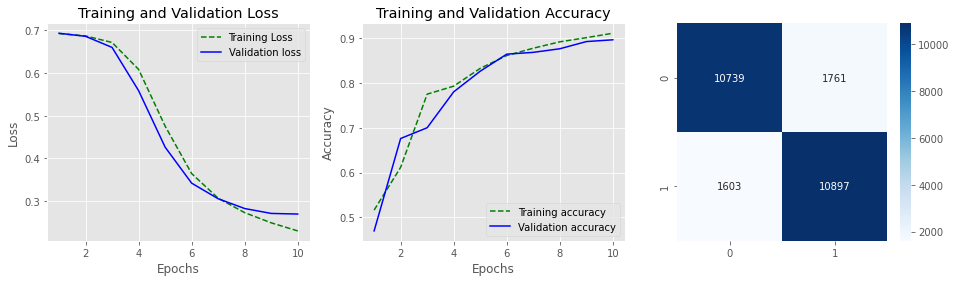

In [66]:
history_dict = history.history

acc = history_dict['acc']
val_acc = history_dict['val_acc']
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1,len(acc) + 1)

# Plotting metrics
fig, [ax1, ax2, ax3] = plt.subplots(1,3, figsize=(16,4))

ax1.plot(epochs, loss_values,  'g--', label = 'Training Loss')
ax1.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
ax1.set_title('Training and Validation Loss')
ax1.set_xlabel("Epochs")
ax1.set_ylabel("Loss")
ax1.legend()

ax2.plot(epochs, acc,  'g--', label = 'Training accuracy')
ax2.plot(epochs, val_acc, 'b', label = 'Validation accuracy')
ax2.set_title('Training and Validation Accuracy')
ax2.set_xlabel("Epochs")
ax2.set_ylabel("Accuracy")
ax2.legend()

confusion_matrix = metrics.confusion_matrix(y_true=y_test, y_pred=np.round(model.predict(X_test)))
heatmap(confusion_matrix, annot = True, cmap='Blues', fmt='g', ax = ax3);